<a href="https://colab.research.google.com/github/erenofc28/bank-marketing-classifier/blob/main/bank_marketing_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# data (as pandas dataframes)
X = bank_marketing.data.features
y = bank_marketing.data.targets

# metadata
print(bank_marketing.metadata)

# variable information
print(bank_marketing.variables)


{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'ID': 277, 'type': 'NATIVE', 'title': 'A data-driven approach to predict the s

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
y.head()

,y
0,no
1,no
2,no
3,no
4,no


In [ ]:
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN


In [ ]:
X.isnull().sum()

,0
age,0
job,288
marital,0
education,1857
default,0
balance,0
housing,0
loan,0
contact,13020
day_of_week,0


In [ ]:
missing = ["poutcome","contact","education","job"]
for col in missing:
  X[col].fillna(X[col].mode()[0],inplace=True)

<ipython-input-785-2630080003>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[col].fillna(X[col].mode()[0],inplace=True)
<ipython-input-785-2630080003>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col].fillna(X[col].mode()[0],inplace=True)


In [ ]:
X.shape

(45211, 16)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,may,261,1,-1,0,failure
1,44,technician,single,secondary,no,29,yes,no,cellular,5,may,151,1,-1,0,failure
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,76,1,-1,0,failure
3,47,blue-collar,married,secondary,no,1506,yes,no,cellular,5,may,92,1,-1,0,failure
4,33,blue-collar,single,secondary,no,1,no,no,cellular,5,may,198,1,-1,0,failure


In [ ]:
cat_cols = ["job","marital","education","default","housing","loan","contact","month","poutcome"]
dic = {}
for col in cat_cols:
  dic[col] = LabelEncoder()
  X.loc[:,col] = dic[col].fit_transform(X[col])

In [ ]:
le = LabelEncoder()
y.loc[:,"y"] = le.fit_transform(y["y"])

In [ ]:
from sklearn.linear_model import LogisticRegression


In [ ]:
X["target"] = y["y"]
corr_mat = X.corr()

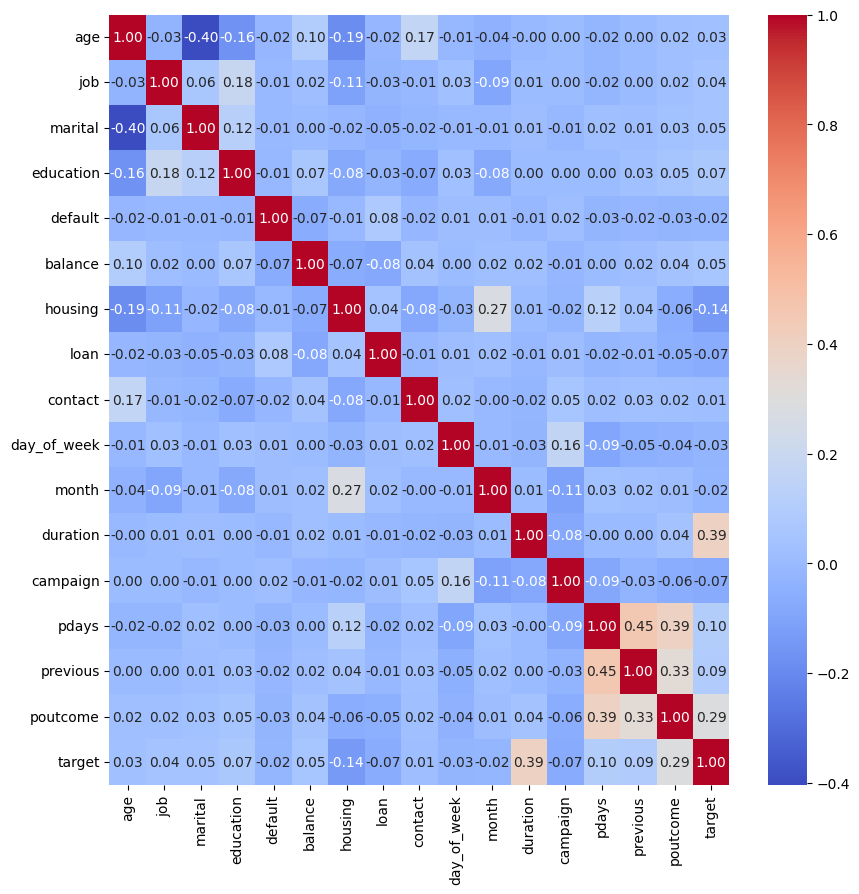

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_mat,fmt=".2f",cmap="coolwarm",annot=True)
plt.show()

In [ ]:
from sklearn.feature_selection import SelectKBest,f_classif

In [ ]:
X = X.drop(columns=["target"])

In [ ]:
selector = SelectKBest(score_func=f_classif,k=5)
k_selected = selector.fit_transform(X,y)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
X = X.loc[:,selector.get_support()]

In [ ]:
model = LogisticRegression()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric_cols = ["duration",	"pdays",	"previous"]
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

In [ ]:
X.head()

,housing,duration,pdays,previous,poutcome
0,1,0.011016,-0.411453,-0.25194,0
1,1,-0.416127,-0.411453,-0.25194,0
2,1,-0.707361,-0.411453,-0.25194,0
3,1,-0.645231,-0.411453,-0.25194,0
4,0,-0.233620,-0.411453,-0.25194,0


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {
    "max_iter":[100,500,1000],
    "penalty":["l2","l1"],
    "solver":["liblinear","saga"],
    "C":[0.1,0.5]
}

In [ ]:
y = y.astype(int)

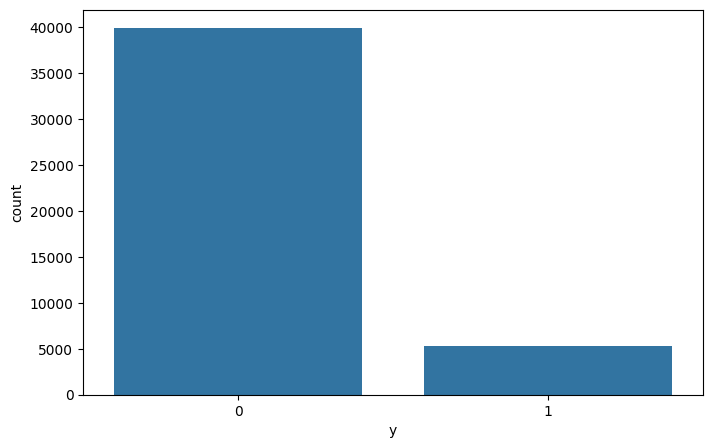

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x=y["y"])
plt.show()

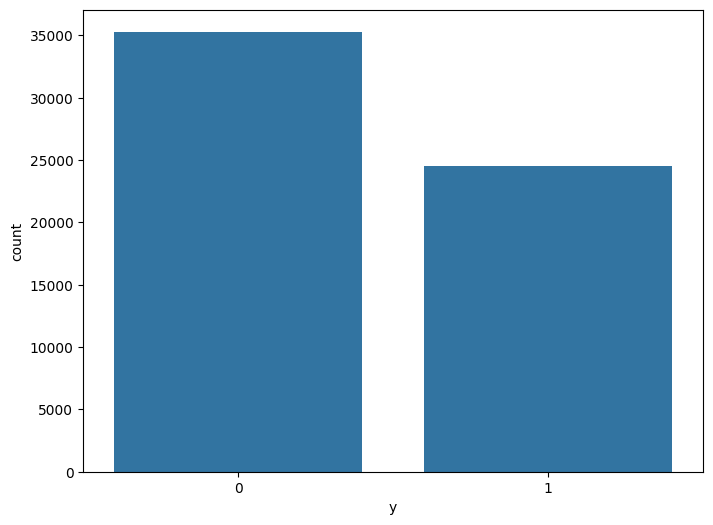

In [ ]:
from imblearn.combine import SMOTEENN
smoteenn = SMOTEENN()
X_resampled, y_resampled = smoteenn.fit_resample(X, y)
plt.figure(figsize=(8,6))
sns.countplot(x=y_resampled["y"])
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_resampled,y_resampled,train_size=0.8,random_state=3,stratify=y_resampled)

In [ ]:
grid_search = GridSearchCV(model,params,cv=5,scoring="accuracy")
grid_search.fit(x_train,y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Best Parameters: {'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score: 0.8922602942391308


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score: 0.8922602942391308


In [ ]:
best_params = grid_search.best_params_
model = LogisticRegression(**best_params)

In [ ]:
model.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

In [ ]:
print(y.dtypes)  # Check if `y` is categorical or numeric


y    int64
dtype: object


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
pred = model.predict(x_train)
print("training data :", accuracy_score(pred,y_train) * 100)

training data : 89.25110684153371


In [ ]:
pred = model.predict(x_test)
print("test data : ",accuracy_score(pred,y_test) * 100)

test data :  90.01754239411912


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      7060
           1       0.91      0.84      0.87      4911

    accuracy                           0.90     11971
   macro avg       0.90      0.89      0.90     11971
weighted avg       0.90      0.90      0.90     11971



In [ ]:
input = (0,	0.768224,	-0.411453,	-0.251940,	0) #actual output : 1
input = np.asarray(input)
input = input.reshape(1,-1)
pred = model.predict(input)
print(pred)

[1]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
x_test.head()

,housing,duration,pdays,previous,poutcome
17368,0.0,-0.338465,-0.411453,-0.251940,0.0
47601,0.0,-0.233812,3.864726,0.302853,0.0
55543,0.0,5.123711,-0.411453,-0.251940,0.0
49032,0.0,2.152385,-0.411453,-0.251940,0.0
50824,0.0,0.805145,-0.411453,-0.251940,0.0


In [ ]:
y_test.head()

,y
17368,0
47601,1
55543,1
49032,1
50824,1


In [ ]:
y.head()

,y
0,0
1,0
2,0
3,0
4,0


In [ ]:
X.head()

,housing,duration,pdays,previous,poutcome
0,1,0.011016,-0.411453,-0.25194,0
1,1,-0.416127,-0.411453,-0.25194,0
2,1,-0.707361,-0.411453,-0.25194,0
3,1,-0.645231,-0.411453,-0.25194,0
4,0,-0.233620,-0.411453,-0.25194,0


In [ ]:
y.tail()

,y
45206,1
45207,1
45208,1
45209,0
45210,0


In [ ]:
X.tail()

,housing,duration,pdays,previous,poutcome
45206,0,2.791329,-0.411453,-0.251940,0
45207,0,0.768224,-0.411453,-0.251940,0
45208,0,3.373797,1.436189,1.050473,2
45209,0,0.970146,-0.411453,-0.251940,0
45210,0,0.399328,1.476138,4.523577,1


In [ ]:
y.head()

,y
0,0
1,0
2,0
3,0
4,0


In [ ]:
X_resampled.shape

(59855, 5)

In [ ]:
y_resampled.shape

(59855, 1)

In [ ]:
X.shape


(45211, 5)

In [ ]:
y.shape

(45211, 1)